In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365
...,...,...,...
95,95,2.055072,8.686851
96,96,0.864149,2.901486
97,97,-1.586101,0.786207
98,98,1.558528,5.447475


In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365
...,...,...
95,2.055072,8.686851
96,0.864149,2.901486
97,-1.586101,0.786207
98,1.558528,5.447475


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


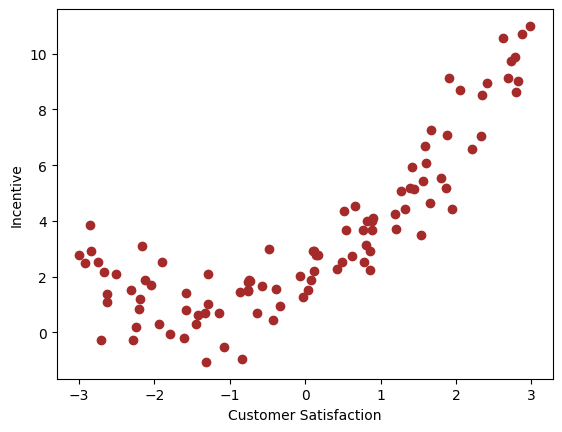

In [8]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"], color = "brown")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [10]:
#train-test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15)

In [12]:
#scaling

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
y_pred = regression.predict(X_test)

In [18]:
score = r2_score(y_test, y_pred)
print(score)

0.2705652535622246


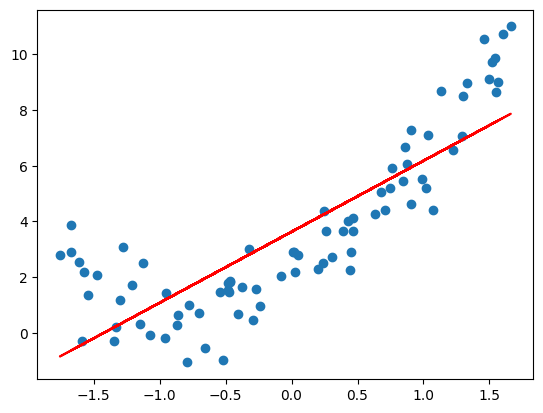

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

In [20]:
poly = PolynomialFeatures()

In [21]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
regression.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
y_pred_poly = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)

0.7685687698788557


In [24]:
print("coef_:", regression.coef_)
print("intercept_:", regression.intercept_)

coef_: [0.         2.63871762 1.54959954]
intercept_: 2.076676429793282


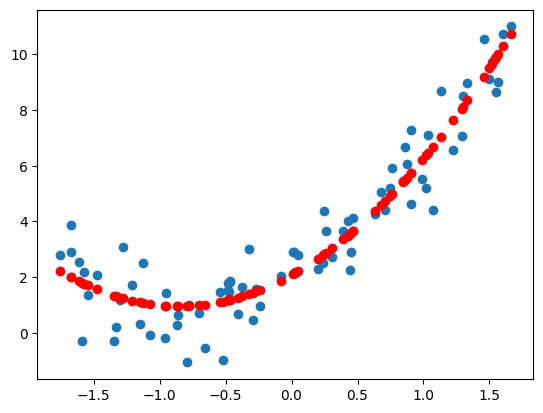

In [25]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [26]:
#new data

In [27]:
new_df = pd.read_csv("3-newdatas.csv")

In [28]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [29]:
new_df.rename(columns= {"0":"Customer Satisfaction"}, inplace=True)

In [30]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [31]:
X_new = new_df[["Customer Satisfaction"]]

In [32]:
X_new = scaler.transform(X_new)

In [33]:
X_new_poly = poly.transform(X_new)

In [34]:
y_new = regression.predict(X_new_poly)

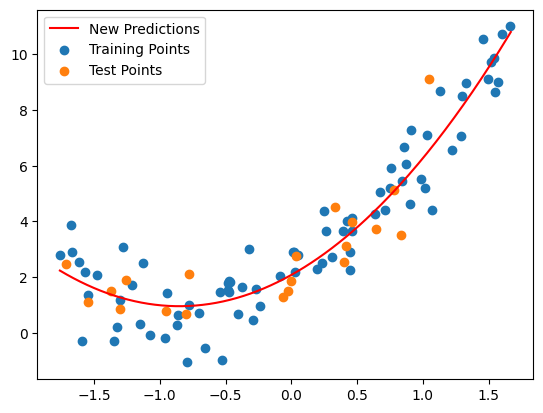

In [35]:
plt.plot(X_new, y_new, "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

In [36]:
#pipeline

In [37]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

R2 score:  0.2705652535622246


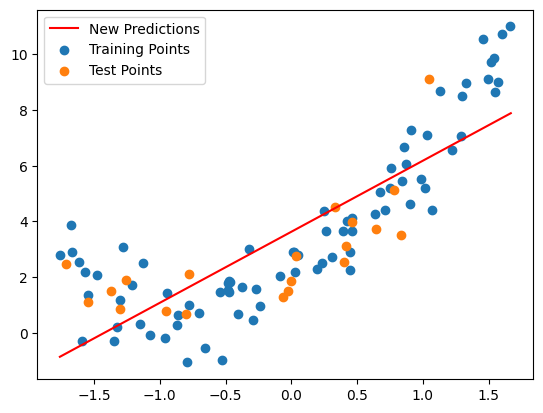

R2 score:  0.7685687698788558


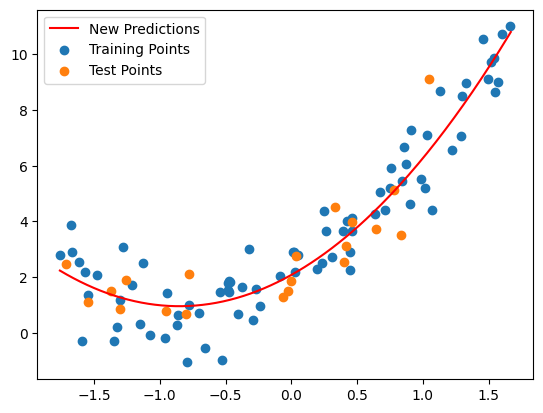

R2 score:  0.757344362140105


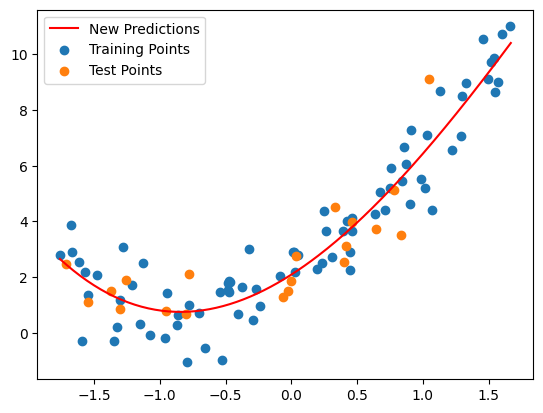

In [39]:
for degree in [1,2,3]:
    poly_regression(degree)